# Music-Project


## 1. Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## 2. Import Dataset

In [186]:
df1 = pd.read_json("data/famousArtists.json")
df2 = pd.read_json("data/recomAlbums.json")

print("Analyze recomAlbums.json")
print("==========================")
df1.info()

df2.head(20)


Analyze recomAlbums.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist    2648 non-null   object
 1   hasImg    2648 non-null   int64 
 2   country   2648 non-null   object
 3   isGroup   2648 non-null   int64 
 4   instrs    2648 non-null   object
 5   id        2648 non-null   int64 
 6   genres    2648 non-null   object
 7   lifespan  2648 non-null   object
dtypes: int64(3), object(5)
memory usage: 165.6+ KB


,artist,year,title,score,id,genres
0,Miles Davis + Keith Jarrett,1971,Live,9.9,3713430,"Jazz, Post-Bop, Hard Bop"
1,Wadada Leo Smith,2012,Ten Freedom Summers,9.9,3565068,Jazz
2,John Coltrane,2014,Offering: Live At Temple University,9.4,6081970,"Jazz, Jazz Instrument, Post-Bop"
3,Marius Neset,2011,Golden Xplosion!,9.2,2865917,"Jazz, Jazz Instrument"
4,Dave Stapleton,2012,Flight,9.2,4422585,Jazz
5,Miles Davis,1981,Miles Davis,9.2,528772,"Jazz, Fusion, Jazz-Funk"
6,The Miles Davis Quintet,1971,Live,9.1,3109937,"Jazz, Jazz Instrument, Post-Bop"
7,Keith Jarrett,2011,Rio,9.0,3211424,"Jazz, Avant-Garde, Piano Jazz"
8,Vijay Iyer Trio,2012,Accelerando,8.8,3428880,"Jazz, Piano Jazz, Jazz Instrument"
9,Marc Ribot's Ceramic Dog,2013,Your Turn,8.8,4569178,"Jazz, Avant-Garde"


SyntaxError: invalid syntax (Temp/ipykernel_7472/3252024900.py, line 3)

### Clean Genre

In [196]:
df2["genre"] = df2["genres"].str.split(", ").str[0]

df2.drop(columns = ['genres','id'])
m_df = pd.merge(df1, df2, on="artist", how='inner') # Is inner join the best option? isn't there a poss. to Join on just ..
m_df = m_df.drop(columns = ['hasImg','instrs','id_x','genres_x','id_y','genres_y']) # drop unnessecary columns
m_df = m_df[m_df['isGroup'] == 0]

# Get Age of the Artists

sel = m_df["lifespan"].str.contains("\d-\d", regex=True)
m_df = m_df.loc[sel,]#to remove the people that have unkown birthday or are still alive

m_df["born"]=m_df["lifespan"].str[0:4]
m_df["died"]=m_df["lifespan"].str[5:9]
m_df['age'] = pd.to_numeric(m_df['died'])-pd.to_numeric(m_df['born'])
#m_df = m_df.drop_duplicates(subset=['artist']) # remove Artist that have multiple Albums
m_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 676
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   artist    163 non-null    object 
 1   country   163 non-null    object 
 2   isGroup   163 non-null    int64  
 3   lifespan  163 non-null    object 
 4   year      163 non-null    object 
 5   title     163 non-null    object 
 6   score     163 non-null    float64
 7   genre     163 non-null    object 
 8   born      163 non-null    object 
 9   died      163 non-null    object 
 10  age       163 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 15.3+ KB


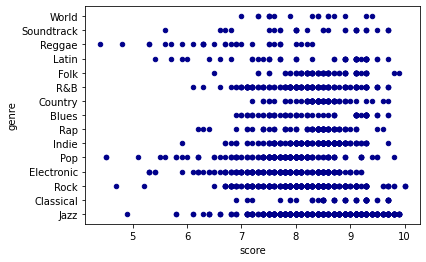

In [198]:
ax1 = df2.plot.scatter(x='score',
                      y = 'genre',
                      c='DarkBlue')

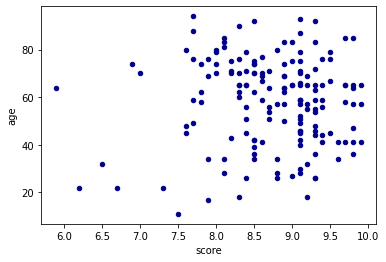

In [185]:
ax1 = m_df.plot.scatter(x='score',
                      y='age',
                      c='DarkBlue')